# Timeseries Workshop - 01 Introduction

In [1]:
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

DATA_DIR = Path("..") / Path("data")

## What are time series?
* Time series are data points indexed in time order.
* Time series data are a collection of observations obtained through repeated measurements over time.


## Toy example - Sunspot Data
<img src="../images/sunspot.gif" width="100">

* Monthly counts of sunspots from mit 18th century to present
* Univariate time series
* Strong preriodicity of 11 year cycle (actually 22y)
* No dominant trend

In [2]:
df = pd.read_parquet(DATA_DIR / "sunspots.parquet")
df.head()

_, ax = plt.subplots(1,1, figsize=(12, 4))
_ = df.set_index("date").plot(ax=ax)

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.


## What is forecasting?
* Predicting future values of a time series through values and events in the past and present, e.g.

## Forecasting vs. supervised machine learning
#### Supervised learning &#x1F440; 
* We know the values of predictor variables &#x2705; 
* We assume that future data looks the same as past data &#x2705; 
#### Forecasting &#x1F4C8; 
* We often don't know the values of predictor variables &#x274C;
* Sometimes we don't even have predictors &#x274C;
* Time series are dynamic: distributions change! &#x274C;



## Forecasting modelling approach
```mermaid
graph TD
Z(Forecasting) --> A(Specialised<br/>models)
Z(Forecasting) --> B(Off-the-shelf<br/>algorithms)
A --> C(Exponential smoothing,<br/>ARIMA)
A --> D(Prophet)
A --> E(Recursive NNs)
B --> F(Feature engineering!)
```

# TODO: 
* Univariate stuff with sunspots, airlines: 
    * Naive baseline (make up a metric, MAE vs MAPE)
    * Autoregressive stuff: ARIMA
    * GBDTs
    * Prophet (with events?)
* Multivariate stuff with power consumption:
  * Naive baseline
  * VAR
  * GBDTs
* Multivariate stuff with logistics data or Rossmann:
  * Multi-variate multi-horizon problem
  * Naive baseline
  * GBDTs
  * Confidence intervals: 
    * Bootstrapping
    * Quantile regression
  * Temporal fusion transformers?!



In [17]:
df = pd.read_csv("../data/airline.csv")
df = df.rename(columns={"Month": "month", "#Passengers": "passengers"})
df["month"] = pd.to_datetime(df["month"])

In [19]:
df.to_parquet("../data/airline_passengers.parquet")

<Axes: xlabel='month'>

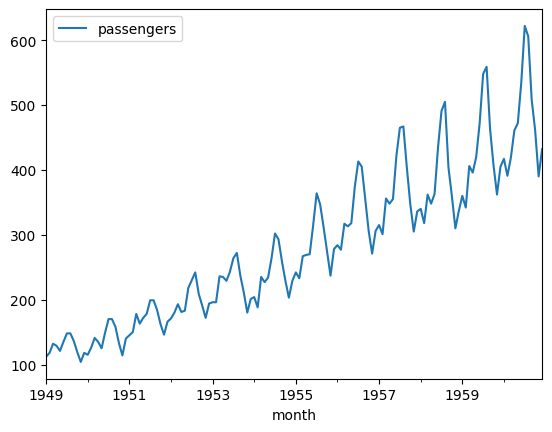

<Axes: xlabel='date'>

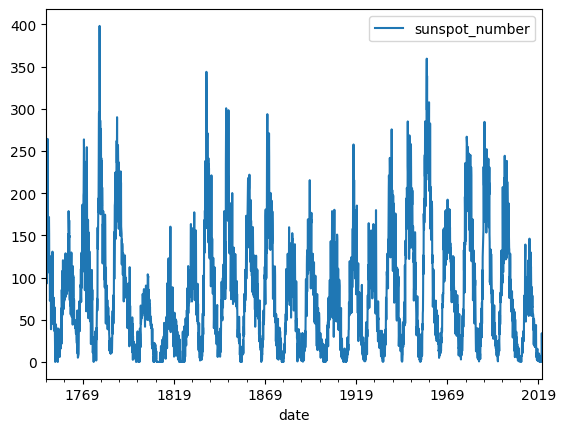

In [25]:
pd.read_parquet("../data/sunspots.parquet").set_index("date").plot()

In [6]:
df["date"] = pd.to_datetime(df["date"])

In [8]:
df.to_parquet("../data/sunspots.parquet")

In [3]:
df.date.loc[0]

'1749-01-31'

<Axes: >

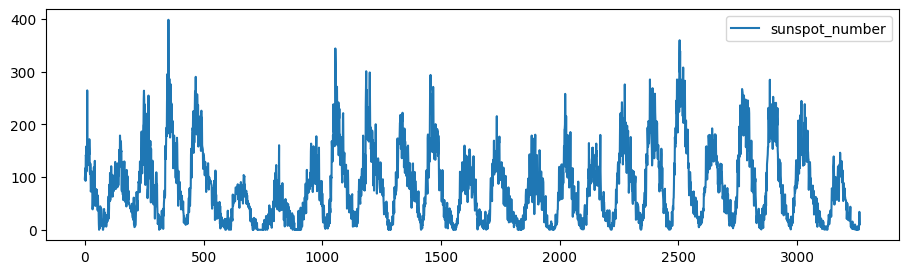

In [36]:
fig, ax = plt.subplots(1,1, figsize=(11,3))
df.plot(ax=ax)

In [13]:
df

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number,sunspot_number,date
0,0,1749-01-31,96.7,96.7,1749-01-31
1,1,1749-02-28,104.3,104.3,1749-02-28
2,2,1749-03-31,116.7,116.7,1749-03-31
3,3,1749-04-30,92.8,92.8,1749-04-30
4,4,1749-05-31,141.7,141.7,1749-05-31
...,...,...,...,...,...
3260,3260,2020-09-30,0.6,0.6,2020-09-30
3261,3261,2020-10-31,14.4,14.4,2020-10-31
3262,3262,2020-11-30,34.0,34.0,2020-11-30
3263,3263,2020-12-31,21.8,21.8,2020-12-31


In [23]:
df[["date", "sunspot_number"]].to_csv("../data/sunspot_data.csv", index=False)

In [19]:
pd.read_csv("../data/sunspots.csv")

,Unnamed: 0,date,sunspot_number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7
...,...,...,...
3260,3260,2020-09-30,0.6
3261,3261,2020-10-31,14.4
3262,3262,2020-11-30,34.0
3263,3263,2020-12-31,21.8
